<a href="https://colab.research.google.com/github/minye3025/minye-project/blob/main/AI_03_%EB%B0%95%EB%AF%BC%EC%98%88_section1(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section1 Project**

## **주제: 다음 분기에 어떤 게임을 설계해야 할까?**


### 1.   데이터 전처리
### 2.   데이터 예측
### 3.   데이터 분석
### 4.   분석 결과

## **[ 데이터 전처리 ]**
데이터 전처리란? 자료들의 형식을 맞추고, 사용하기 편하게 깨끗하게 만드는 것

---


1.  다른 형식의 데이터 있는지 확인 하기

1.  빈공간 채우기 or 버리기

2. 숫자 형식들 맞추기

4. year, publisher (N/A), Genre 결측치 삭제 진행 (완료)


---


* 결측치의 총 갯수는 357개 인데 삭제해도 크게 영향이 없을 것 같아서 삭제 진행하기로함


In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/section1_poject_vgames2.csv', index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 특정 열에 잘못된 형식의 데이터가 있는지 확인
print(df.Name.value_counts())
print(df.Platform.value_counts())
print(df.Year.value_counts())
print(df.Genre.value_counts())
print(df.Publisher.value_counts())
print(df.NA_Sales.value_counts())
print(df.EU_Sales.value_counts())
print(df.JP_Sales.value_counts())
print(df.Other_Sales.value_counts())

Need for Speed: Most Wanted                12
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
Ratatouille                                 9
                                           ..
Tornado                                     1
Armed and Dangerous                         1
Bubble Bobble Evolution                     1
Tsukigime Ranko's Longest Day               1
Mobile Suit Gundam: Federation vs. Zeon     1
Name: Name, Length: 11493, dtype: int64
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
2009.0    1421
2008.0 

In [ ]:
# df1 = Sales 단위 맞추기
# 기본 단위 M 으로 설정 -> M 삭제
df1 = df.copy()
df1["NA_Sales"] = df["NA_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df1["EU_Sales"] = df["EU_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df1["JP_Sales"] = df["JP_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)
df1["Other_Sales"] = df["Other_Sales"].str.replace(pat=r'[M]', repl=r'', regex=True)

In [ ]:
# df1 = Sales 단위 맞추기
# K가 있는 항목에 0.001 곱해줘서 단위를 M으로 통일
df1['NA_Sales1'] = df1['NA_Sales'].replace({'K' : '*0.001'},regex=True).map(pd.eval)
df1['EU_Sales1'] = df1['EU_Sales'].replace({'K' : '*0.001'},regex=True).map(pd.eval)
df1['JP_Sales1'] = df1['JP_Sales'].replace({'K' : '*0.001'},regex=True).map(pd.eval)
df1['Other_Sales1'] = df1['Other_Sales'].replace({'K' : '*0.001'},regex=True).map(pd.eval)

In [ ]:
# df2 = 년도 맞춰주기
df2 = df1.copy()
def plus(x):
  if x < 50:
    return x+2000
  elif x > 50 and x < 100:
    return x+1900
  else:
    return x

df2['Year_plus'] = df1.Year.apply(plus)

In [ ]:
# df2

df2 = df2.sort_values(by="Year_plus", ascending=True)   # Year_plus 기준 오름차순 정렬
df2 = df2.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)  # 기존 컬럼 삭제
df2 = df2[['Name', 'Platform', 'Year_plus', 'Genre', 'Publisher', 'NA_Sales1', 'EU_Sales1',
       'JP_Sales1', 'Other_Sales1']]   # 컬럼 재배치

In [ ]:
pd.DataFrame(df2.isnull().sum(), columns=["결측치 개수"])
df3 = df2.dropna()    # 결측치 제거
df3 = df3.reset_index(drop=True)    # 인덱스 번호 재설정
df3 = df3.astype({'Year_plus': 'int'})    # 년도 타입 int로 변경

In [ ]:
df4 = df3.copy()
def func(x):
  if x >= 1980 and x < 1990:
    return 1980
  elif x >= 1990 and x < 2000:
    return 1990
  elif x >= 2000 and x < 2010:
    return 2000 
  elif x >= 2010 and x < 2021:
    return 2010

df4['Years'] = df3.Year_plus.apply(lambda x : func(x))
df4 = df4.astype({'Years': 'int'})    # 년도 타입 int로 변경
df4

,Name,Platform,Year_plus,Genre,Publisher,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Years
0,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,1980
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,1980
2,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,1980
3,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1980
4,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1980
...,...,...,...,...,...,...,...,...,...,...
16236,Terraria,3DS,2016,Action,505 Games,0.00,0.03,0.04,0.00,2010
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,2010
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,2010
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,2010


## **[ 데이터 분석 ]**

전처리 작업을 완료한 자료를 바탕으로 목적에 맞게 데이터를 결합, 분리하여 새로운 데이터를 갖고 무엇을 나타내는지, 무엇을 예측할 수 있는지 분석 진행

---

**< 분석 예시 >**

*   제작 회사별 선호하는 게임 장르 (또는 플랫폼)는 무엇일까?

*   어떤 장르의 상승폭이 가장 클까?

*   가장 최근 분기의 출고량 1위 장르는? 지역은?

---

**< 필수 분석 내용 >**
1. 지역에 따라서 선호하는 게임 장르가 다를까?

2. 연도별 게임의 트렌드가 있을까?

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


### **1. 지역에 따라서 선호하는 게임 장르가 다를까?**


*   지역별 총 출고량 확인
*   년도도 보기
*   지역별로 가장 많이 판매된 장르 확인
*   시각화 진행



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
# 장르불문 지역별 총 출고량 확인
df4.sum()

Name            BridgeAsteroidsBoxingKaboom!DefenderMissile Co...
Platform        2600260026002600260026002600260026002600260026...
Year_plus                                                32586052
Genre           MiscShooterFightingMiscMiscShooterActionMiscPl...
Publisher       ActivisionAtariActivisionActivisionAtariAtariA...
NA_Sales1                                                 4307.04
EU_Sales1                                                 2393.57
JP_Sales1                                                 1271.39
Other_Sales1                                               783.37
Years                                                    32511480
dtype: object

In [ ]:
# 장르별 지역 출고량
df4g = df4.groupby("Genre", as_index=False)[["NA_Sales1", "EU_Sales1", "JP_Sales1", "Other_Sales1"]].sum()
df4g

,Genre,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


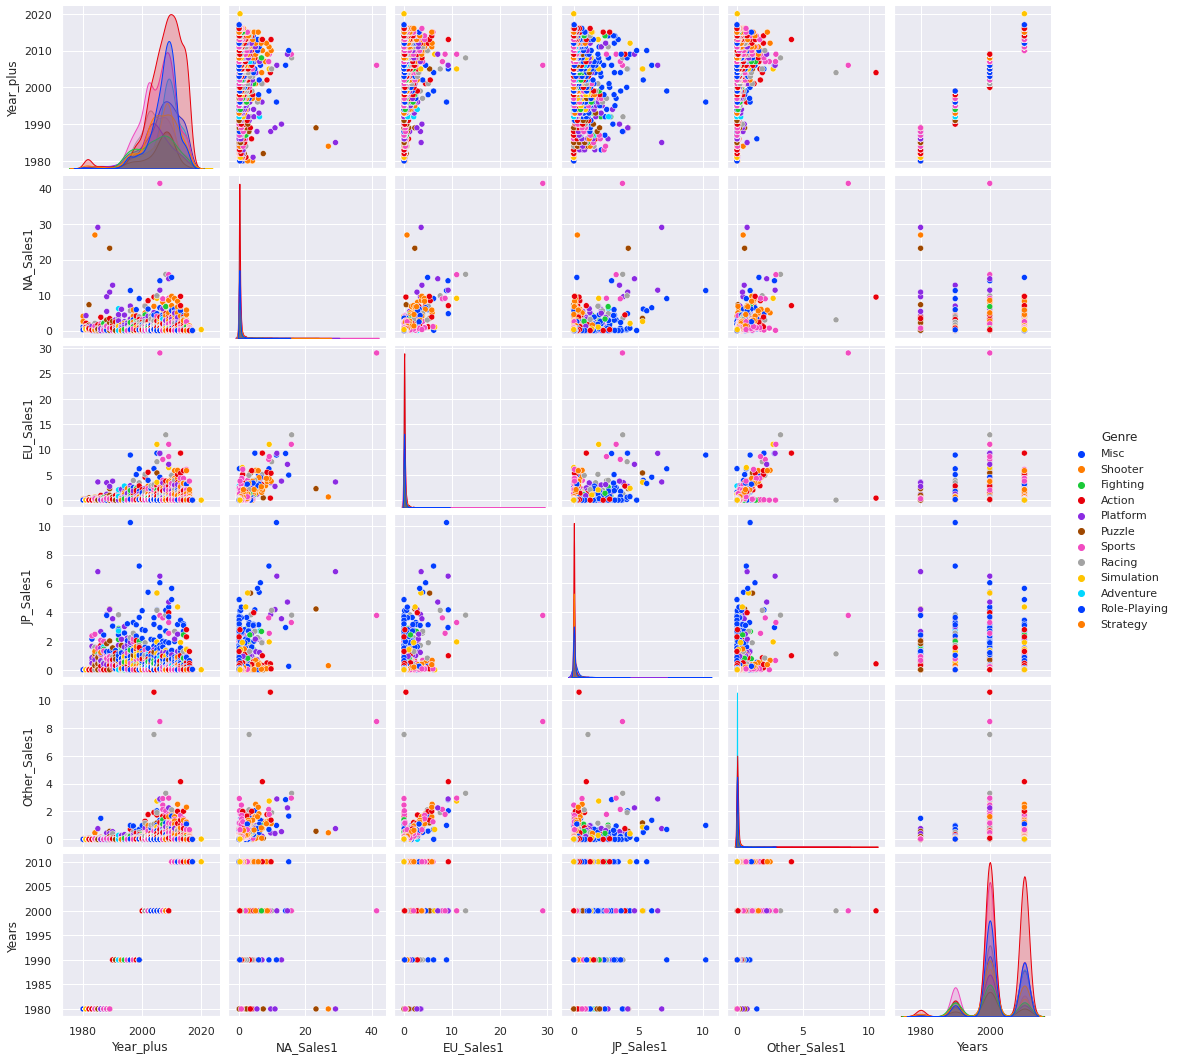

In [ ]:
sns.pairplot(df4, diag_kind='kde', hue="Genre", palette='bright'); # pastel, bright, deep, muted, colorblind, dark
plt.show();

In [ ]:
# 지역별 가장 출고량이 높은 장르
# NA, EU, Other = 'Action' 장르 출고량 1위
# JP = 'Role-Playing' 장르 출고량 1위
df4g.max()

Genre           Strategy
NA_Sales1         858.75
EU_Sales1         513.64
JP_Sales1         342.93
Other_Sales1      183.99
dtype: object

In [ ]:
# 지역별 가장 출고량이 낮은 장르
# NA, EU, Other = 'Stategy' 장르 출고량 12위
# JP = 'Shooter' 장르 출고량 12위
df4g.min()

Genre           Action
NA_Sales1        67.83
EU_Sales1        44.82
JP_Sales1        38.18
Other_Sales1     11.23
dtype: object

In [ ]:
df4g1 = df4g.copy()
df4g1 = df4g1.T
df4g1 = df4g1.rename(columns=df4g1.iloc[0])
df4g1 = df4g1.drop(df4g1.index[0])
df4g1

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales1,858.75,101.79,220.35,394.73,445.38,121.58,354.7,318.76,574.48,181.43,667.26,67.83
EU_Sales1,513.64,63.66,99.9,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales1,156.6,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.1
Other_Sales1,183.99,16.7,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


In [ ]:
# one-sample chi-square test
# 귀무가설: 출고량은 지역별로 장르에 따라 차이가 없을 것이다
# 대립가설: 출고량은 지역별로 장르에 따라차이가 있다.

df4g2 = df4g1.copy()
df4g2.loc[:, '합계'] = df4g2.sum(axis=1)
df4g2

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,합계
NA_Sales1,858.75,101.79,220.35,394.73,445.38,121.58,354.7,318.76,574.48,181.43,667.26,67.83,4307.04
EU_Sales1,513.64,63.66,99.9,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82,2393.57
JP_Sales1,156.6,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.1,1271.39
Other_Sales1,183.99,16.7,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23,783.37


In [ ]:
import scipy.stats
import numpy as np
from scipy.stats import chisquare  

s_obs = df4g2['합계']

chi1 = chisquare(s_obs, axis=None)
chi1

# 결과: 귀무가설 기각 => 출고량은 지역별로 장르에 따라 차이가 있다.

Power_divergenceResult(statistic=3355.99570835954, pvalue=0.0)

In [ ]:
# two-sample chi-square test
# 귀무가설: 지역별 출고량은 장르와 관련이 없다 / 지역과 장르에 따른 출고량은 서로 독립적이다.
# 대립가설: 지역별 출고량은 장르와 관련이 있다.

df4g2['합계'].sum()

8755.36999999999

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency

df4g3 = df4g2[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       '합계']].astype('category')

chi2, pvalue, _, _ = stats.chi2_contingency(df4g3, correction=False)
chi2, pvalue

# 결과: P-value가 0보다 작으므로 귀무가설 기각 / 그러므로 지역별 출고량은 장르와 관련이 있다.

(684.3363405169234, 8.939614513073685e-121)

In [ ]:
df6.max()

Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year_plus                               2020
Genre                               Strategy
Publisher                       responDESIGN
NA_Sales1                              41.49
EU_Sales1                              29.02
JP_Sales1                              10.22
Other_Sales1                           10.57
Years                                   2010
dtype: object

In [ ]:
# NA지역 최고 출고량 게임
df6[df6['NA_Sales1'] == 41.49]

,Name,Platform,Year_plus,Genre,Publisher,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Years
6395,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,2000


In [ ]:
# EU지역 최고 출고량 게임
df6[df6['EU_Sales1'] == 29.02]

,Name,Platform,Year_plus,Genre,Publisher,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Years
6395,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,2000


In [ ]:
# JP지역 최고 출고량 게임
df6[df6['JP_Sales1'] == 10.22]

,Name,Platform,Year_plus,Genre,Publisher,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Years
904,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,1990


In [ ]:
# Other지역 최고 출고량 게임
df6[df6['Other_Sales1'] == 10.57]

,Name,Platform,Year_plus,Genre,Publisher,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Years
4950,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,2000




---


**지역에 따라서 선호하는 게임 장르가 다를까?**



*   북미, 유럽, 그 외 지역은 Action, Sports 순으로 선호하는 반면 

    일본 지역은 Role-Playing, Action 순으로 선호한다.

*   또한 지역별로 출고량에 차이가 나는데 이 차이는 장르와 관련이 있다. 

*   게임 회사 Nintendo 가 각 지역별 출고량 1위의 게임을 만들었다.

*   북미지역과 유럽지역은 비슷한 성향을 갖는것 같다.



---



### **2. 연도별 게임의 트렌드가 있을까?**

*   연도별 출고량 변화 확인
*   각 지역 년도별/장르별 출고량 확인

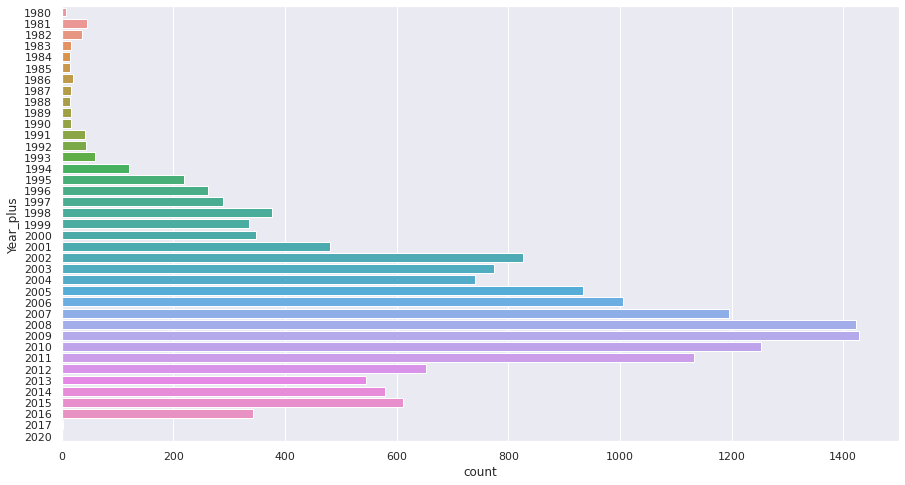

In [ ]:
# 장르, 지역 불문 연도별 게임 출고량
df5 = df4.copy()
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot(y="Year_plus", data=df5)
plt.show()

In [ ]:
#  연도별 출시한 게임 수
df5 = df4.groupby("Year_plus", as_index=False )["Genre"].count() 
df5

,Year_plus,Genre
0,1980,8
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [ ]:
# 북미지역 // 장르별 년도 출고량
df5_groupby_NA = df4.groupby("Genre", as_index=False )["NA_Sales1"].sum() 
df5_groupby_NAh = df4.groupby(["Year_plus", "Genre"])["NA_Sales1"].sum()
df5_groupby_NAh = df5_groupby_NAh.unstack()
df5_groupby_NAh.fillna(0, inplace=True)

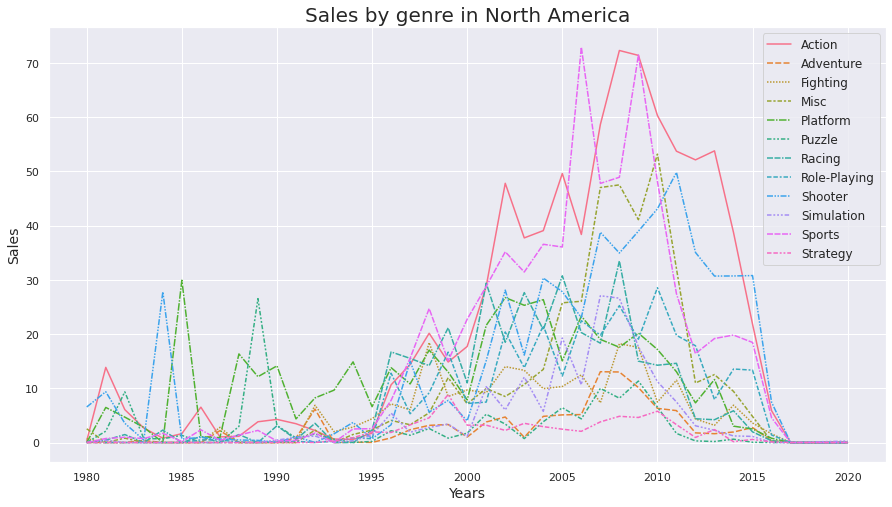

In [ ]:
# 초반 Shooter, Platform 
# 중반 이후 액션, 스포츠, Misc, Shooter

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

ax = sns.lineplot(data=df5_groupby_NAh)

plt.title('Sales by genre in North America', fontsize=20)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [ ]:
# 유럽지역 // 장르별 년도 출고량
df5_groupby_EU = df4.groupby("Genre", as_index=False )["EU_Sales1"].sum() 
df5_groupby_EUh = df4.groupby(["Year_plus", "Genre"])["EU_Sales1"].sum() 
df5_groupby_EUh = df5_groupby_EUh.unstack()
df5_groupby_EUh.fillna(0, inplace=True)
# df5_groupby_EUh

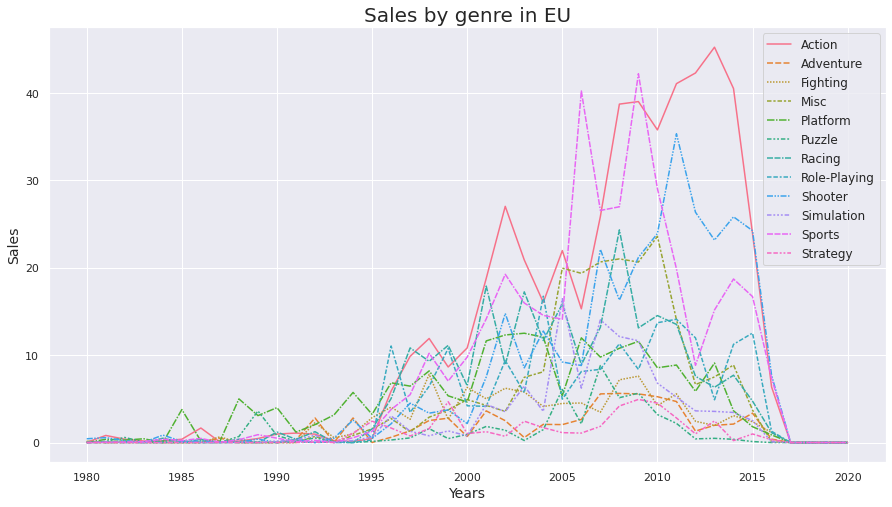

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]

ax = sns.lineplot(data=df5_groupby_EUh)

plt.title('Sales by genre in EU', fontsize=20)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [ ]:
# 일본지역 // 장르별 년도 출고량
df5_groupby_JP = df4.groupby("Genre", as_index=False )["JP_Sales1"].sum() 
df5_groupby_JPh = df4.groupby(["Year_plus", "Genre"])["JP_Sales1"].sum() 
df5_groupby_JPh = df5_groupby_JPh.unstack()
df5_groupby_JPh.fillna(0, inplace=True)
# df5_groupby_JPh

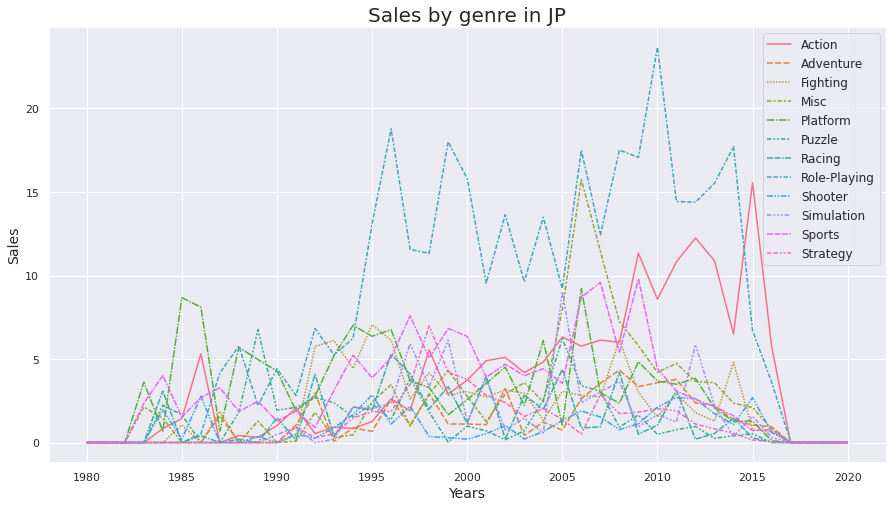

In [ ]:
# 전반적으로 롤플레잉

plt.rcParams['figure.figsize'] = [15, 8]

ax = sns.lineplot(data=df5_groupby_JPh)

plt.title('Sales by genre in JP', fontsize=20)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [ ]:
# 기타지역 // 장르별 년도 출고량
df5_groupby_OT = df4.groupby("Genre", as_index=False )["Other_Sales1"].sum() 
df5_groupby_OTh = df4.groupby(["Year_plus", "Genre"])["Other_Sales1"].sum() 
df5_groupby_OTh = df5_groupby_OTh.unstack()
df5_groupby_OTh.fillna(0, inplace=True)
# df5_groupby_OTh

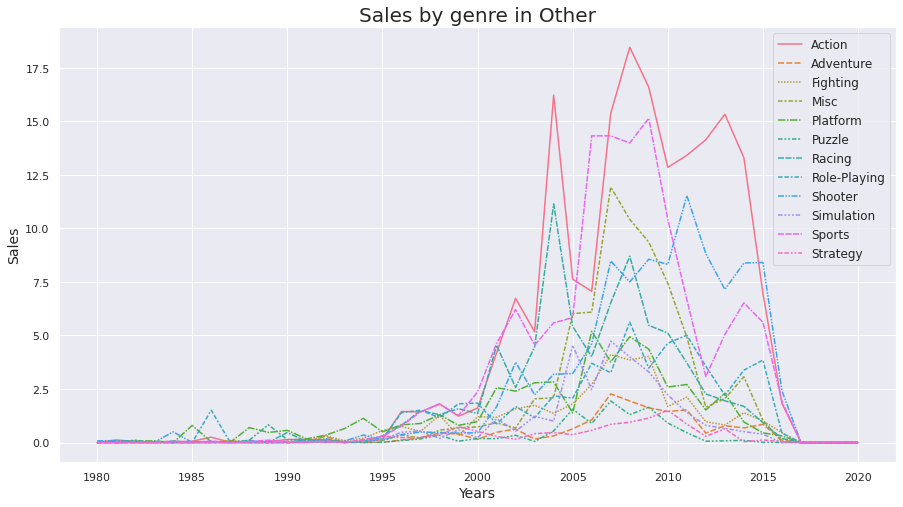

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]

ax = sns.lineplot(data=df5_groupby_OTh)

plt.title('Sales by genre in Other', fontsize=20)
plt.ylabel('Sales', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [ ]:
# 장르별, 연도별 평균 판매량
df4_test = df4.groupby("Genre", as_index=False )["Years"].mean()
df4_test = df4.groupby(["Years", "Genre"]).mean().T

df4_test
# df5_groupby_test

Years                1980            ...         2010             
Genre              Action Adventure  ...       Sports     Strategy
Year_plus     1982.727273  1985.000  ...  2012.015817  2011.850299
NA_Sales1        0.574242     1.285  ...     0.270703     0.079341
EU_Sales1        0.065000     0.260  ...     0.203216     0.073653
JP_Sales1        0.125909     0.805  ...     0.026960     0.039521
Other_Sales1     0.009091     0.040  ...     0.069033     0.020958

[5 rows x 47 columns]



---


**연도별 게임의 트렌드가 있을까?**



*   결론은 있다.
*   게임산업은 1990년대 중반부터 큰 폭으로 상승했으며, 다양한 장르, 플랫폼, 회사등을 통해 산업을 확장해갔다.

*   지역별로도 선호하는 게임이 있지만, 연도 별로도 선호하는 게임이 차이가 난다. 이 부분은 새로운 장르의 부재로 인한 것일 수도 있을 것이다.

*   게임의 장르가 다양하지 않던 

    1980년대는 Platform, Puzzle, Shooter 등의 장르의 출고량이 많았고,

    1990년대에는 Action, Platform, Racing장르가 높을 출고량을 나타냈고, 새로운 Strategy 장르가 출시 되었다.

    2000년대에는 게임산업이 발달하여 전반적인 출고량이 늘었고, 장르의 비중도 다양해졌다.

    2010년대에는 게임의 전체 출고량이 감소하는 추세이나, 여전히 Action, Shooter, Sports의 출고량이 높다.


---



### **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**


*   장르별 최고 출고량
*   지역별 최고 출고량
*   출시 년도 

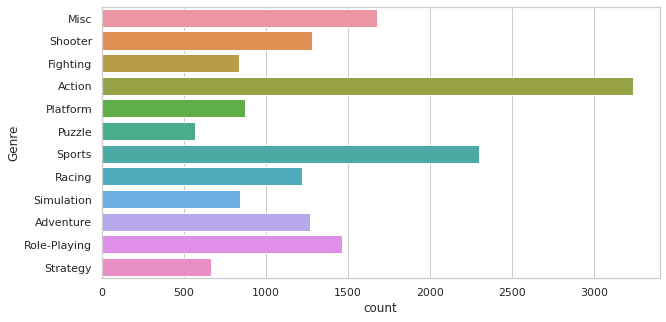

In [ ]:
# 장르별 판매량
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(y="Genre", data=df4)
plt.show()

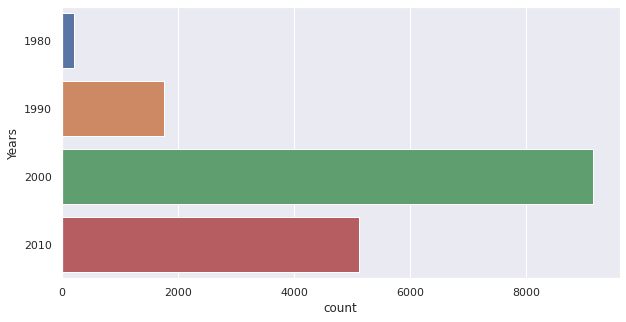

In [ ]:
# 년대별 출고량
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(y="Years", data=df4)
plt.show()

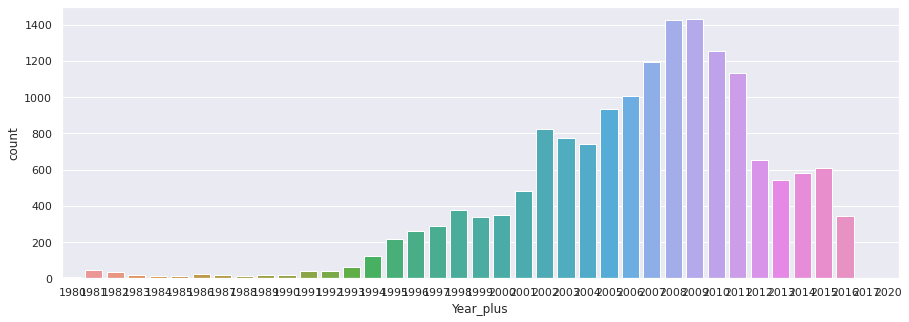

In [ ]:
# 년도별 출고량
plt.rcParams['figure.figsize'] = [15, 5]
sns.countplot(x="Year_plus", data=df4)
plt.show()

In [ ]:
# 장르별 지역 출고량
df4g = df4.groupby("Genre", as_index=False)[["NA_Sales1", "EU_Sales1", "JP_Sales1", "Other_Sales1"]].sum()
df4g

,Genre,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


<Figure size 720x360 with 0 Axes>

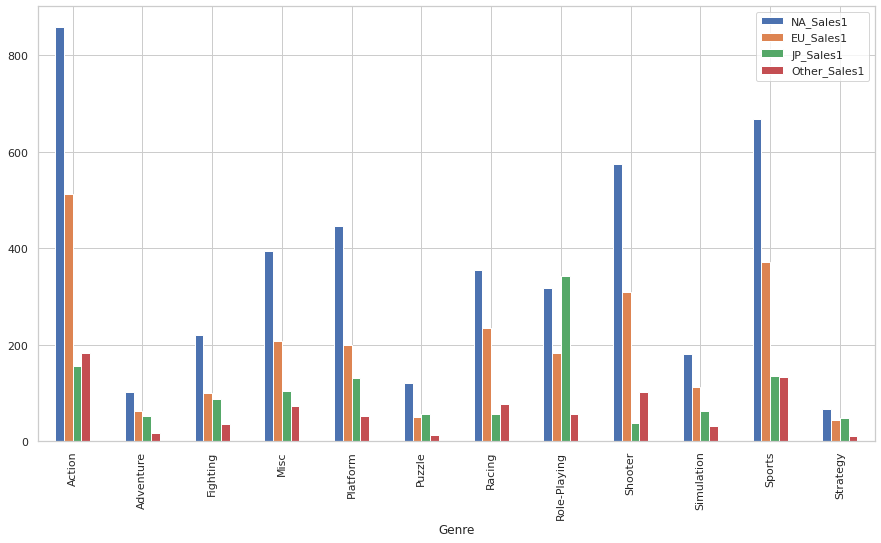

In [ ]:
sns.set_style('whitegrid');
plt.clf();
plt.rcParams['figure.figsize'] = [15, 8]
df4.groupby("Genre")[["NA_Sales1", "EU_Sales1", "JP_Sales1", "Other_Sales1"]].sum().plot(kind='bar')
plt.show()

In [ ]:
df4g1 = df4g.T
df4g1 = df4g1.rename(columns=df4g1.iloc[0])
df4g1 = df4g1.drop(df4g1.index[0])
df4g1

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales1,858.75,101.79,220.35,394.73,445.38,121.58,354.7,318.76,574.48,181.43,667.26,67.83
EU_Sales1,513.64,63.66,99.9,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales1,156.6,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.1
Other_Sales1,183.99,16.7,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


<Figure size 1080x576 with 0 Axes>

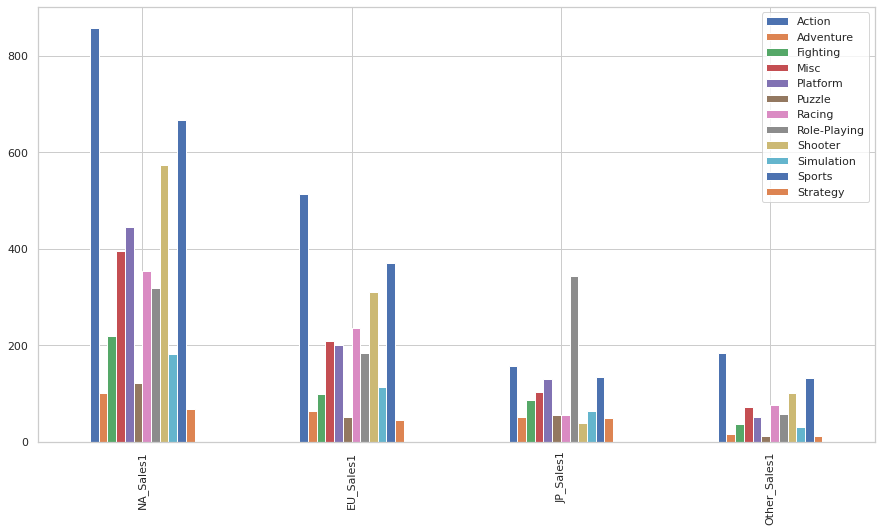

In [ ]:
sns.set_style('whitegrid');
plt.clf();
plt.rcParams['figure.figsize'] = [15, 8]
df4g1.plot(kind='bar')
plt.show()

In [ ]:
df4g1.loc[:, '합계'] = df4g1.sum(axis=1)
df4g1

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,합계
NA_Sales1,858.75,101.79,220.35,394.73,445.38,121.58,354.7,318.76,574.48,181.43,667.26,67.83,8614.08
EU_Sales1,513.64,63.66,99.9,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82,4787.14
JP_Sales1,156.6,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.1,2542.78
Other_Sales1,183.99,16.7,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23,1566.74




---


**출고량이 높은 게임에 대한 분석 및 시각화 프로세스**



*   출고량이 가장 많은 지역: NA(북미지역)

*   출고량이 가장 많은 연도: 2000년대
*   출고량이 가장 많은 장르: Action
*   JP(일본지역)은 다른지역과 다르게 Role-Playin 장르의 출고량이 압도적으로 많다.




---

## **[ 분석 결과 ]**


1.   지역별로 선호하는 게임 장르가 다르다.

2.   게임산업이 예전에 비해 감소했지만 현재 사람들이 선호하는 장르는 Action, Shooter, Sports 이다.
3.   일본지역은 다른지역과 다르게 Role-Playing 장르를 선호한다.
4.   출고량은 NA(북미지역) > EU(유럽지역) > JP(일본지역) > Otehr(기타) 순이다.
5.   NA(북미지역)의 출고량 = EU(유럽지역) + JP(일본지역) + Otehr(기타)



---



*   북미지역의 출고량이 압도적으로 높기 때문에 그 부분을 잘 잡으면 유럽과 다른 지역들도 자연스레 따라올 것이다.

*   현재 가장 인기가 많은 장르는 Action, Sports, Shooter이다.
*   게임 회사 Nintendo 가 각 지역별 출고량 1위의 게임을 만들었다.
*   각 장르별 최고 출고량의 출시년도, 회사, 플랫폼등도 조사하면 좋을 것 같다.



